In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
from pathlib import Path
from warnings import simplefilter

simplefilter("ignore")

#since the inflation rate increases on monthly basis (every 30 days), this datset is time-series data,
import seaborn as sns
plt.style.use("seaborn-whitegrid")
#heree

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'

food = pd.read_csv("Datasets/white_bread.csv", parse_dates=["Date"])

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
food = food.set_index("Date")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
food = food.to_period()

food


,CPI
Date,
2017-01,13.41
2017-02,13.38
2017-03,13.43
2017-04,13.49
2017-05,13.37
...,...
2022-03,16.05
2022-04,16.24
2022-05,17.27


DATASET
y_test
Date
2021-07    15.57
2021-08    15.30
2021-09    15.27
2021-10    15.39
2021-11    15.68
2021-12    15.46
2022-01    15.47
2022-02    16.16
2022-03    16.05
2022-04    16.24
2022-05    17.27
2022-06    17.41
2022-07    17.84
Freq: M, Name: CPI, dtype: float64
DATASET train/test
X_test
         Lag_1
Date          
2021-07  15.24
2021-08  15.57
2021-09  15.30
2021-10  15.27
2021-11  15.39
2021-12  15.68
2022-01  15.46
2022-02  15.47
2022-03  16.16
2022-04  16.05
2022-05  16.24
2022-06  17.27
2022-07  17.41
predict
Date
2021-07    15.265263
2021-08    15.593059
2021-09    15.324862
2021-10    15.295062
2021-11    15.414261
2021-12    15.702325
2022-01    15.483794
2022-02    15.493727
2022-03    16.179120
2022-04    16.069854
2022-05    16.258586
2022-06    17.281708
2022-07    17.420774
Freq: M, Name: CPI, dtype: float64
DATASET train/test/predict
DATASET train/test/predict with shift
COMPARE
y_test
Date
2021-07    15.57
2021-08    15.30
2021-09    15.27
2021-10    15.39

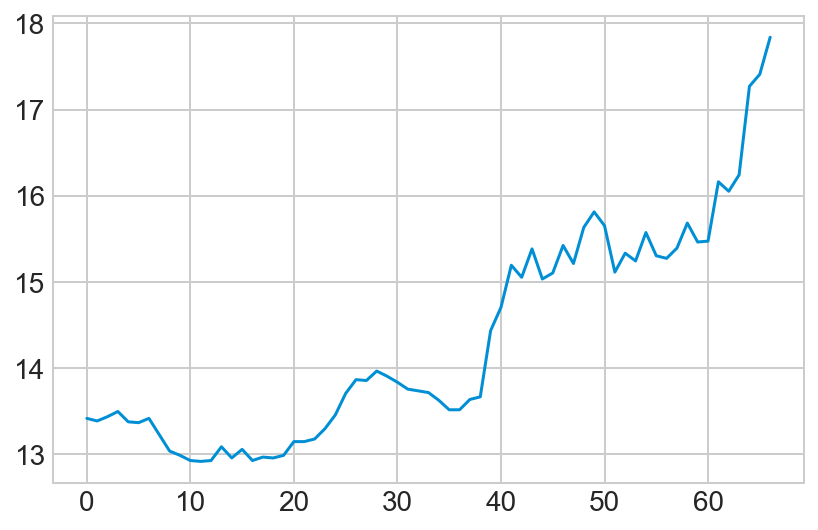

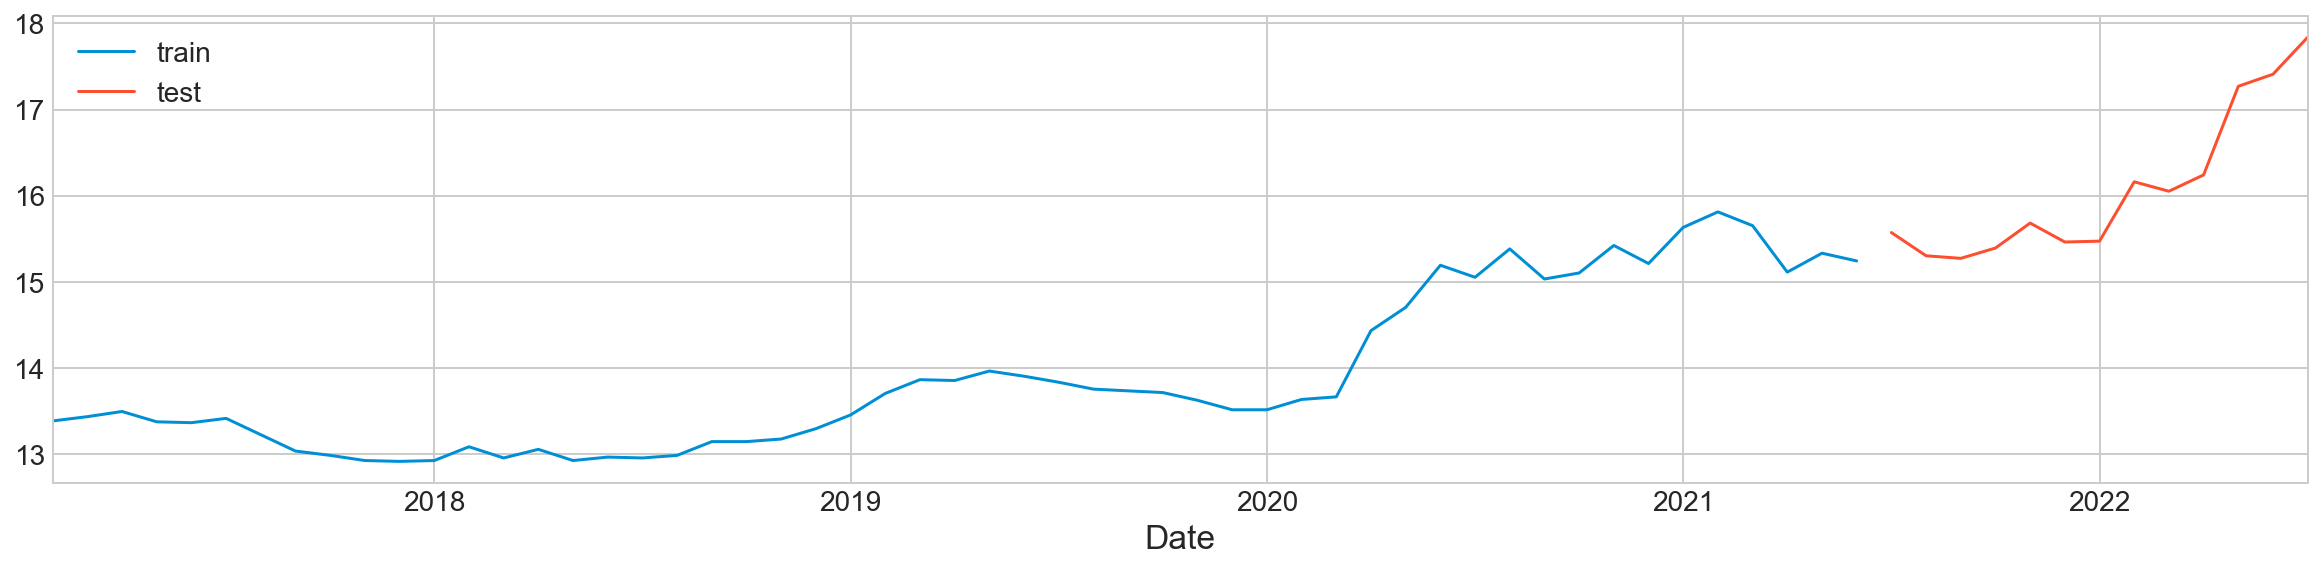

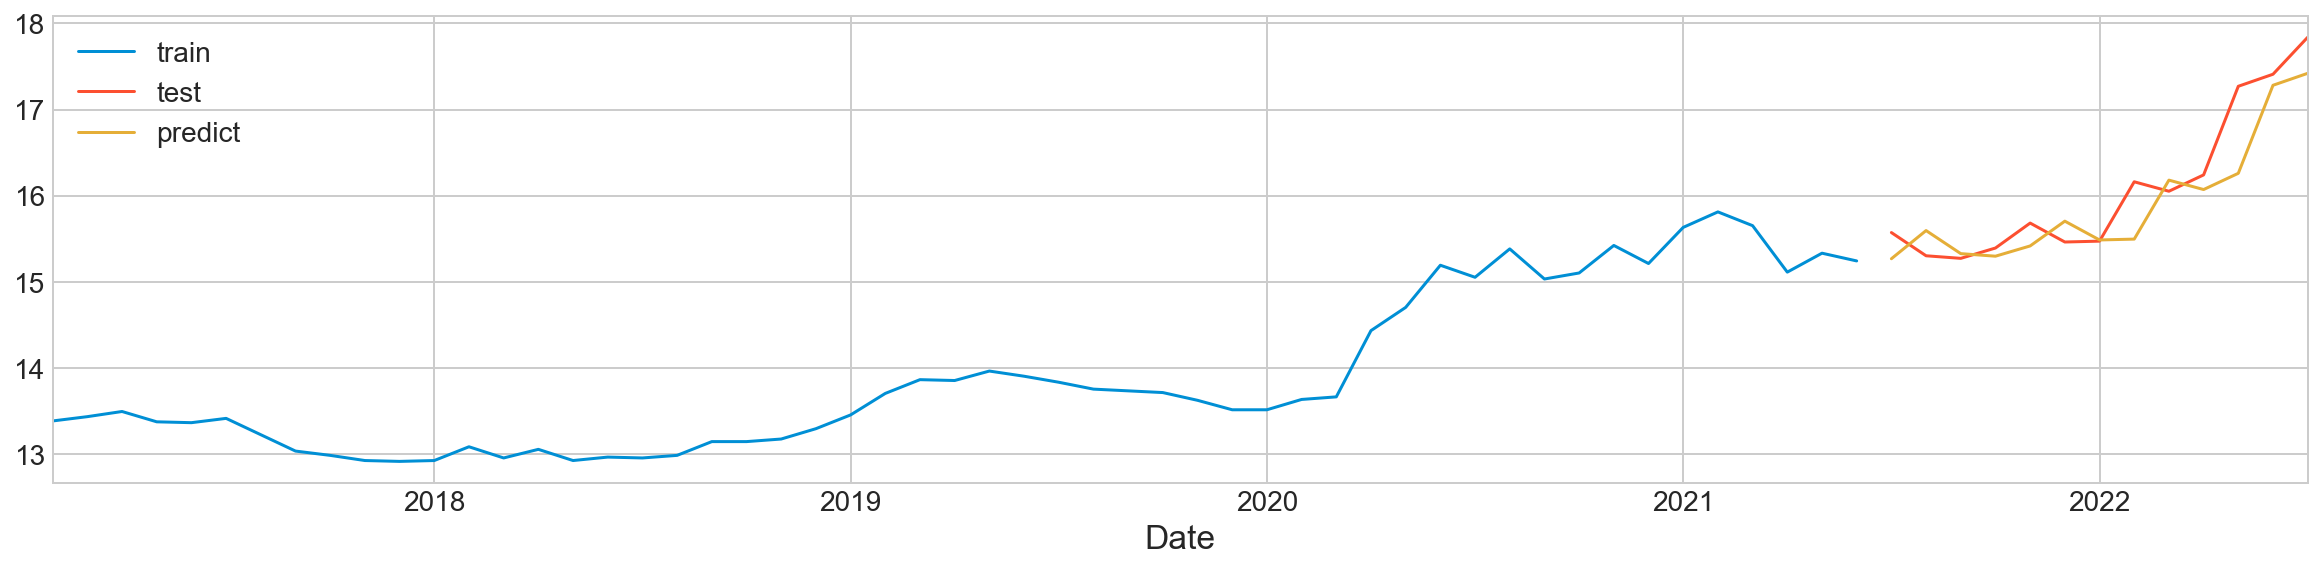

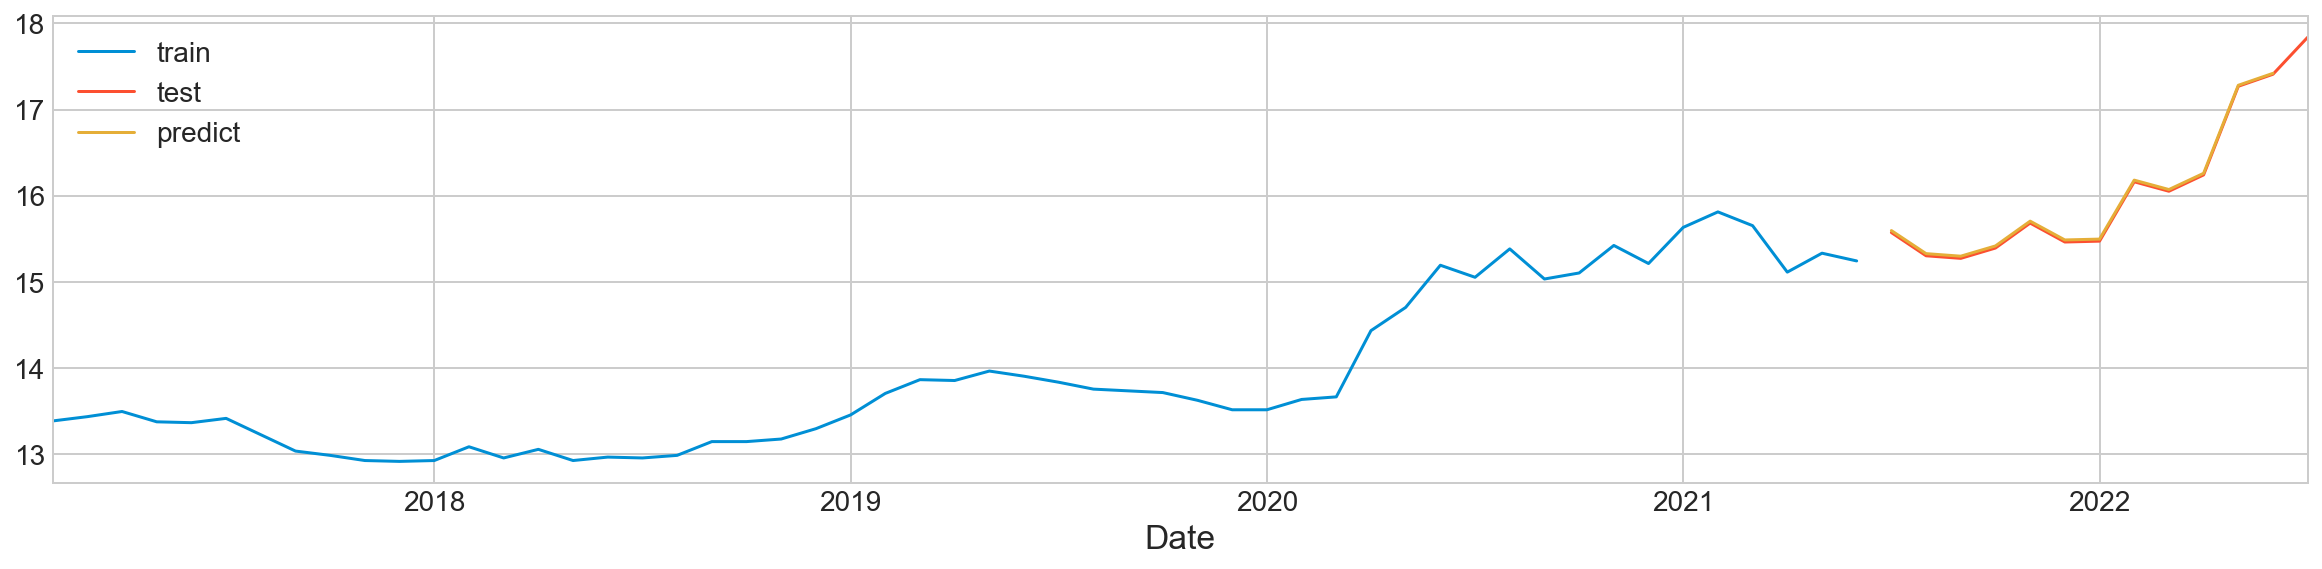

In [2]:

#fig, ax = plt.subplots()
#ax.plot('TimeStep', 'CPI', data=df, color='0.75')
#ax = sns.regplot(x='TimeStep', y='CPI', data=df, ci=None, scatter_kws=dict(color='0.25'))
#ax.set_title('Time Plot of CPI from 2017 to 2022');

# import dataset

df = food.copy()

df['Time'] = np.arange(len(food.index))

df.tail()

# timestep, by months

from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'CPI']  # target

# Train the model
#model = LinearRegression()
#model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
#y_pred = pd.Series(model.predict(X), index=X.index)

print("DATASET")
plt.plot(X,y)

#ax = y.plot(**plot_params)
#ax = y_pred.plot(ax=ax, linewidth=3)
#ax.set_title('Time Plot of CPI in SA');

df['Lag_1'] = df['CPI'].shift(1)
df.tail()

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'CPI']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target


#split into test and train
# train:test = 80%:20% = 54:13
steps = 13 
#X_train is training set for lag, X_test is test set for lag
X_train = X[:-steps]
X_test = X[-steps:] 

#y_train is training set for CPI, y_test is test set for CPI
y_train = y[:-steps]
y_test = y[-steps:] 

#we are going to put X_train and y_train into the linear regression model
print("y_test")
print(y_test)

print("DATASET train/test")
fig, ax=plt.subplots(figsize=(18, 4))
y_train.plot(ax=ax, label='train')
y_test.plot(ax=ax, label='test')
ax.legend();

model = LinearRegression()
model.fit(X_train, y_train)

print("X_test")
print(X_test)

predict = pd.Series(model.predict(X_test),index=X_test.index, name = "CPI")

print("predict")
print(predict)

print("DATASET train/test/predict")

fig, ax=plt.subplots(figsize=(18, 4))
y_train.plot(ax=ax, label='train')
y_test.plot(ax=ax, label='test')
#predict = predict.shift(-1)
predict.plot(ax=ax, label='predict')
ax.legend();

print("DATASET train/test/predict with shift")
fig, ax=plt.subplots(figsize=(18, 4))
y_train.plot(ax=ax, label='train')
y_test.plot(ax=ax, label='test')
#predict = predict.shift(-1)
(predict.shift(-1)).plot(ax=ax, label='predict')
ax.legend();

from sklearn.metrics import mean_squared_error
import math
# Test error
# ==============================================================================


print("COMPARE")
print("y_test")
print(y_test)
predict = predict.fillna(0)
print("predict")
print(predict)
error_mse = mean_squared_error(
                y_true = y_test,
                y_pred = predict
                )

rmse = math.sqrt(error_mse)

print(f"Test error (mse): {error_mse}")

print(f"RMSE: {rmse}")

# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.

from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, predict)
print(f"MAPE:  {mape}")


forecasted = pd.Series(model.predict(X_test),index=X_test.index + 5, name = "CPI")
print("forecasted data")
print(forecasted)

print("data to be added to db")
print(forecasted[-8:])

In [3]:
import pickle
pickle.dump(model, open('white_bread_model.pkl', 'wb'))

In [12]:
temp = forecasted.to_frame()
temp

,CPI
Date,
2021-12,15.265263
2022-01,15.593059
2022-02,15.324862
2022-03,15.295062
2022-04,15.414261
2022-05,15.702325
2022-06,15.483794
2022-07,15.493727
2022-08,16.179120


In [13]:
temp = temp[-8:]
print(temp['CPI'])

Date
2022-05    15.702325
2022-06    15.483794
2022-07    15.493727
2022-08    16.179120
2022-09    16.069854
2022-10    16.258586
2022-11    17.281708
2022-12    17.420774
Freq: M, Name: CPI, dtype: float64


In [14]:
temp.index=temp['CPI'].index.to_series().astype(str)
print(temp)

               CPI
Date              
2022-05  15.702325
2022-06  15.483794
2022-07  15.493727
2022-08  16.179120
2022-09  16.069854
2022-10  16.258586
2022-11  17.281708
2022-12  17.420774


In [15]:
data = temp.to_dict('dict')
CPI = data['CPI']
CPI

{'2022-05': 15.702324691039367,
 '2022-06': 15.483793609202689,
 '2022-07': 15.493726840195265,
 '2022-08': 16.179119778683027,
 '2022-09': 16.069854237764687,
 '2022-10': 16.258585626623635,
 '2022-11': 17.281708418858994,
 '2022-12': 17.420773652755063}

In [16]:
dates = []
cpi = []
for key, value in CPI.items():
    print(key, ' : ', value)
    dates.append(key)
    cpi.append(value)

2022-05  :  15.702324691039367
2022-06  :  15.483793609202689
2022-07  :  15.493726840195265
2022-08  :  16.179119778683027
2022-09  :  16.069854237764687
2022-10  :  16.258585626623635
2022-11  :  17.281708418858994
2022-12  :  17.420773652755063


In [17]:
print(dates)
print(cpi)

['2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12']
[15.702324691039367, 15.483793609202689, 15.493726840195265, 16.179119778683027, 16.069854237764687, 16.258585626623635, 17.281708418858994, 17.420773652755063]


In [18]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import pyrebase

cred = credentials.Certificate('firebase-sdk.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [20]:
db.collection("Prices").document("white bread").update(
{
    'dates': dates,
    'cpi':cpi
})

update_time {
  seconds: 1664132322
  nanos: 131599000
}